<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Исследование-регионов" data-toc-modified-id="Исследование-регионов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование регионов</a></span></li><li><span><a href="#Статистический-анализ" data-toc-modified-id="Статистический-анализ-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Статистический анализ</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Заключение</a></span></li></ul></div>

# Исследование
## Описание проекта

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Задача:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.



## Общая информация

Изучим информацию о таблице, типах данных, диапазоне значений:


Импортируем необходимые библиотеки:

In [8]:
# pip install -U plotly
# pip install -U kaleido
# pip install matplotlib
# pip install -U pandas
# pip install -U matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy import stats as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio 
pio.renderers.default = "svg" # only for GitHub, comment for 
                              # Plotly's interactive
import warnings
warnings.filterwarnings('ignore')

In [9]:
def get_data(path):
    df = pd.read_csv(path)
    display(df.info())
    display(df.head())
    display(df.describe().T)
    try: 
        del df['Unnamed: 0'] #удаление лишнего столбца при наличии
    except KeyError:
        print('Unnamed: 0 не обнаружено лишних столбцов')
        print('')
        
    print('столбцов: ', len(df.columns), df.columns) 
        
    for i in range(0, len(df.columns)):
        print('')
        print('уникальные значения столбца ' + str(i) + ' ' + df.columns[i])
        print(df.iloc[:,i].unique())
        print('')
    return df

In [10]:
df = get_data('/datasets/games.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Unnamed: 0 не обнаружено лишних столбцов

столбцов:  11 Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

уникальные значения столбца 0 Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


уникальные значения столбца 1 Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


уникальные значения столбца 2 Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


уникальные значения столбца 3 Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 

**Вывод** В таблице 16715 строк, 11 колонок. Имеются пропущенные значения, 'tbd' в колонке 9 User_Score. Рассмотрим данные детальнее.

## Подготовка данных

- Заменим названия столбцов (приведем к нижнему регистру);

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;



In [11]:
df.columns = df.columns.str.lower()

- Обработаем пропуски и преобразуем данные в нужные типы (заменим на целочисленные типы там где тип данных с плавающей точкой избыточен)

In [12]:
df.year_of_release = df.year_of_release.fillna(-1)
df.critic_score = df.critic_score.fillna(-1)

df.year_of_release = df.year_of_release.astype(int)
df.critic_score = df.critic_score.astype(int)          

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.4+ MB


- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.



In [14]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
df


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,NaN,NaN,0.01


Проверим таблицу на дубликаты

In [15]:
df.duplicated().sum()

0

Количество уникальных наименований игр

In [16]:
df.name.duplicated().sum()

5155

In [17]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 12 columns and 16715 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
rating,0,6766,40.5,6766,40.5,object
user_score,0,6701,40.1,6701,40.1,object
name,0,2,0.0,2,0.0,object
genre,0,2,0.0,2,0.0,object


Посмотрим внимательнее на столбцы с пропусками:

In [18]:
df.critic_score.value_counts()

-1     8578
 70     256
 71     254
 75     245
 78     240
       ... 
 20       3
 21       1
 17       1
 22       1
 13       1
Name: critic_score, Length: 83, dtype: int64

Пропусков 50%, оставим данные как есть.

In [19]:
df.rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Пропусков 40%, оставим данные как есть.

In [20]:
df.user_score.value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Пропусков 40%, оставим данные как есть. tbd (To Be Determined) рейтинг еще не определен.

In [21]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,NaN,NaN,0.03


Оставим эти строки также без изменений.

Информацию о годе выпуска можно извлечь из некоторых названий

In [22]:
df[df['year_of_release'] == -1].name.unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

**Вывод**: Провели подготовку данных, изменили регистр в названии столбцов, изменили тип данных, добавили новый столбец с сумарными продажами в регионах.

## Исследовательский анализ данных

В этом разделе рассмотрим следующие вопросы:

- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

- Как менялись продажи по платформам. 

- Выберем платформы с наибольшими суммарными продажами и построим распределения по годам. 

- За какой характерный срок появляются новые и исчезают старые платформы?

- Выберем данные за соответствующий актуальный период. Определим актуальный период в результате исследования предыдущих вопросов. Эти данные помогут построить прогноз на 2017 год. 

- Данные за предыдущие годы не учитываются.

- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

- Соотнесем выводы с продажами игр на других платформах.

- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


    Посмотрим сколько игр и на каком количестве платформ выпускалось в разные годы

,year,count_name,count_platform,nunique_name,nunique_platform
0,1981,46,46,46,1
1,1982,36,36,36,1
2,1983,17,17,17,2
3,1984,14,14,14,2
4,1985,14,14,14,4
5,1986,21,21,21,2
6,1987,16,16,16,2
7,1988,15,15,15,4
8,1989,17,17,17,3
9,1990,16,16,16,4


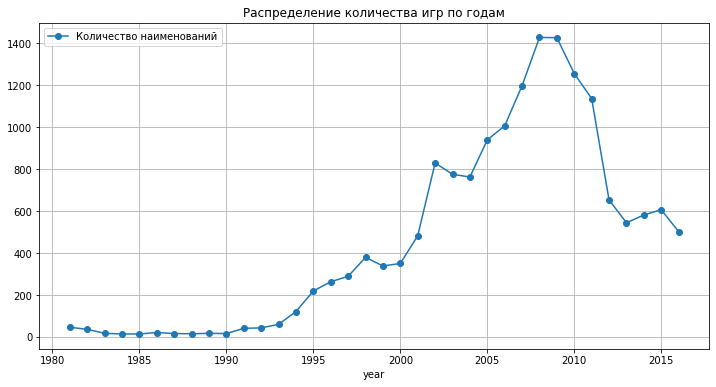

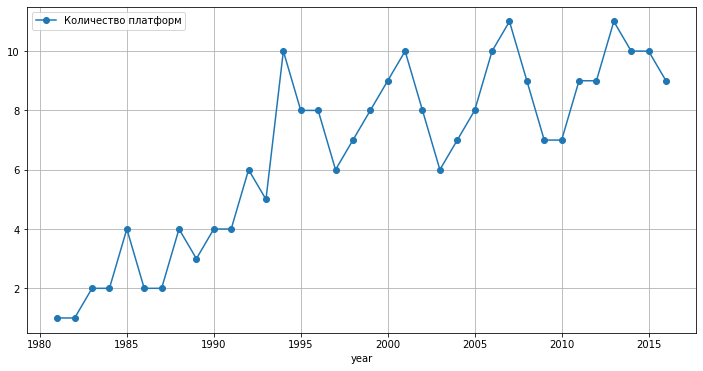

In [23]:
df_pvt = df.pivot_table(index='year_of_release', values=['name', 'platform'], aggfunc=['count','nunique'])
df_pvt = df_pvt.query('year_of_release > 1980').reset_index()
df_pvt.columns = ['year', 'count_name', 'count_platform', 'nunique_name', 'nunique_platform']
display(df_pvt)
ax1 = (df_pvt
       .plot(x='year',
             y='count_name',
             style='o-',
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 1.0,
             label='Количество наименований',
             title='Распределение количества игр по годам'))

ax2 = (df_pvt
       .plot(x='year',
             y='nunique_platform',
             style='o-',
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 1.0,
             label='Количество платформ'))

plt.show()

Видим, что до 1994 на рынке было предствалено не более 6 платформ, в 1993 году выпустилось 60 игр, а уже в 1994 было двукратное увеличение до 121 игры. Количество платформ на которых выходили игры увеличилось до 10. Данные до 1994 года можно отбросить.

In [24]:
df_pvt_plat = df.query('year_of_release != -1').pivot_table(index=['platform', 'year_of_release'], values=['total_sales'], aggfunc=['sum'])
df_pvt_plat = df_pvt_plat.reset_index()
df_pvt_plat.columns = ['platform', 'year', 'sum_sales']
df_pvt_plat

,platform,year,sum_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


Среднее время жизни платформы, лет 7.6
Медиана жизни платформы, лет 6.0


,platform,year
0,PC,31
1,DS,28
2,GB,13
3,PSP,11
4,X360,11
5,PS2,11
6,NES,11
7,Wii,10
8,DC,10
9,PS3,10


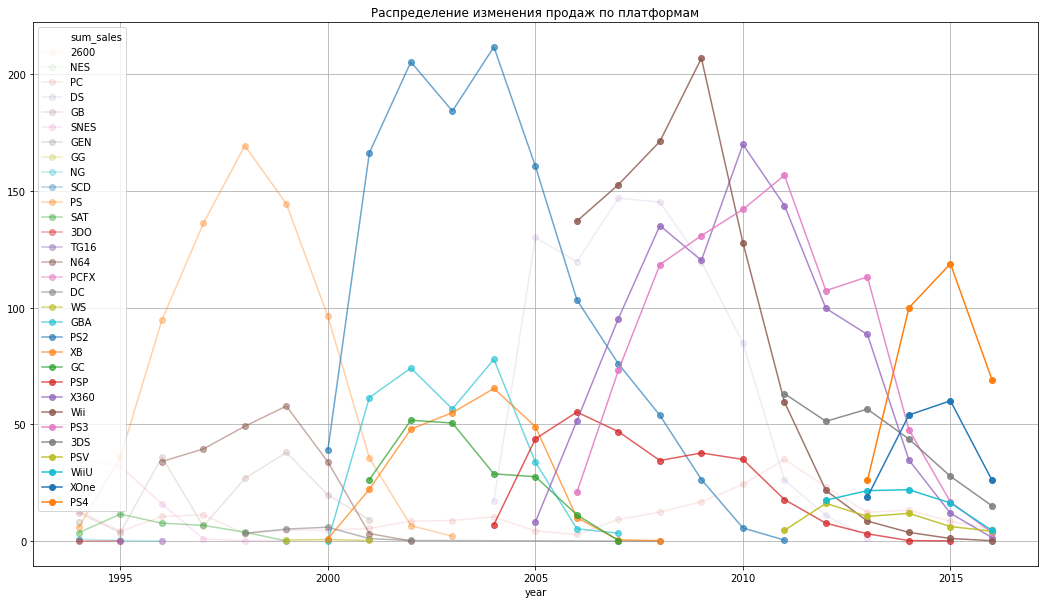

In [25]:
ax1 = (df_pvt_plat.query('year > 1993')
       .plot(x = 'year',
             y='sum_sales',
             style='o-',
             alpha = 0.001,
             title='Распределение изменения продаж по платформам'))

idx = df_pvt_plat.sort_values(by='year', ascending=True)['platform'].unique()
i = 1
year = []
platform_name = []
for platform in idx:
    (year.append(df_pvt_plat.query('platform == @platform').year.max()
                 - df_pvt_plat.query('platform == @platform').year.min()))
    platform_name.append(platform)
    ax2 = (df_pvt_plat.query('year > 1993')
           .query('platform == @platform')
           .plot(x='year',
                 y='sum_sales',
                 style='o-',
                 figsize=(18,10), 
                 grid=True, 
                 legend=True,
                 ax=ax1,
                 alpha = 1/len(idx)*i,
                 label=platform))
    i+=1
    
print('Среднее время жизни платформы, лет', round(np.array(year).mean(), 1))
print('Медиана жизни платформы, лет', round(np.median(np.array(year)).mean(), 1))

d = {'platform': platform_name, 'year': year}
df_y_p = pd.DataFrame(data=d)
display(df_y_p.sort_values(by='year', ascending=False).reset_index(drop=True))

Видим, что большинство платформ имели рост продаж в течении нескольких лет, выраженный пик и снижение продаж вплоть до последующего ухода платформы с рынка. Среднее время жизни платформы 7,6 лет. Медиана - 6, возьмем за актуальный период медианное время жизни платформы.

Выберем платформы с наибольшими суммарными продажами и построим распределения по годам.

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


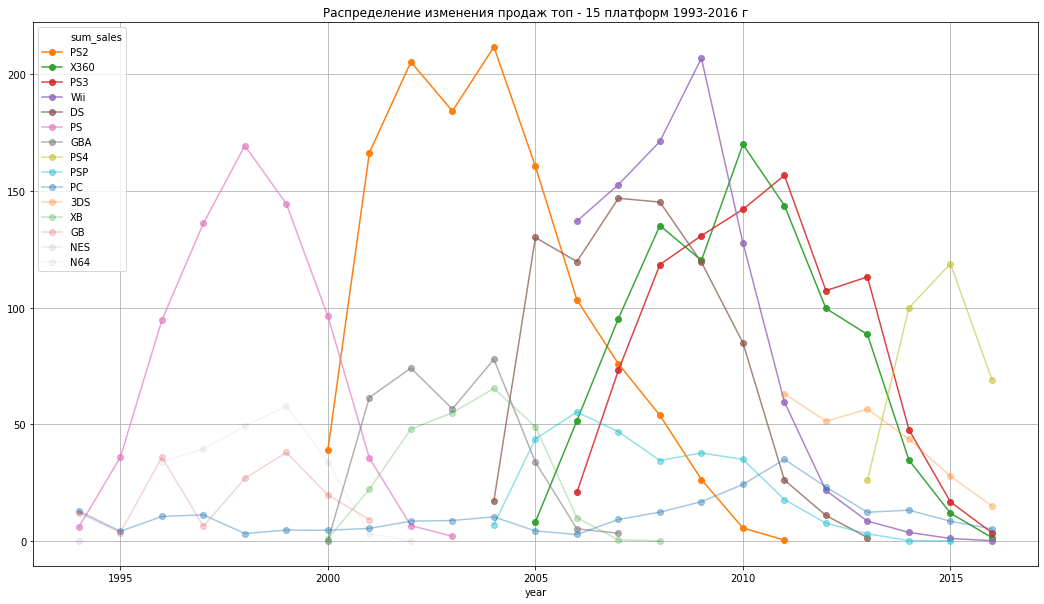

In [26]:
df_platform = (df
 .pivot_table(index='platform',
              values='total_sales',
              aggfunc='sum')

 .sort_values(by='total_sales',
              ascending=False)
 .reset_index()
 .head(15))

idx = df_platform.platform

display(df_platform)

ax1 = (df_pvt_plat.query('year > 1993')
       .plot(x = 'year',
             y='sum_sales',
             style='o-',
             alpha = 0.001,
             title='Распределение изменения продаж топ - 15 платформ 1993-2016 г'))

i = len(df_platform.index)
year = []
for platform in idx:
    ax2 = (df_pvt_plat.query('year > 1993')
           .query('platform == @platform')
           .plot(x='year',
                 y='sum_sales',
                 style='o-',
                 figsize=(18,10), 
                 grid=True, 
                 legend=True,
                 ax=ax1,
                 alpha = 1/len(idx)*i,
                 label=platform))

    i-=1

На графике видим как менялись продажи 15-и платформ с самыми высокими продажами за все время. Самые высокие продажи у PS2 далее следует X360, третье место у PS3.

Возьмем данные за соответствующий актуальный период. В результате исследования предыдущих вопросов актуальный период определим c 2010 по 2016 года. Данные за предыдущие годы учитывать не будем.

,platform,total_sales
0,PS3,445.57
1,X360,380.38
2,PS4,314.14
3,3DS,257.81
4,XOne,159.32
5,PC,97.68
6,Wii,95.02
7,WiiU,82.19
8,PSV,53.81
9,DS,38.73


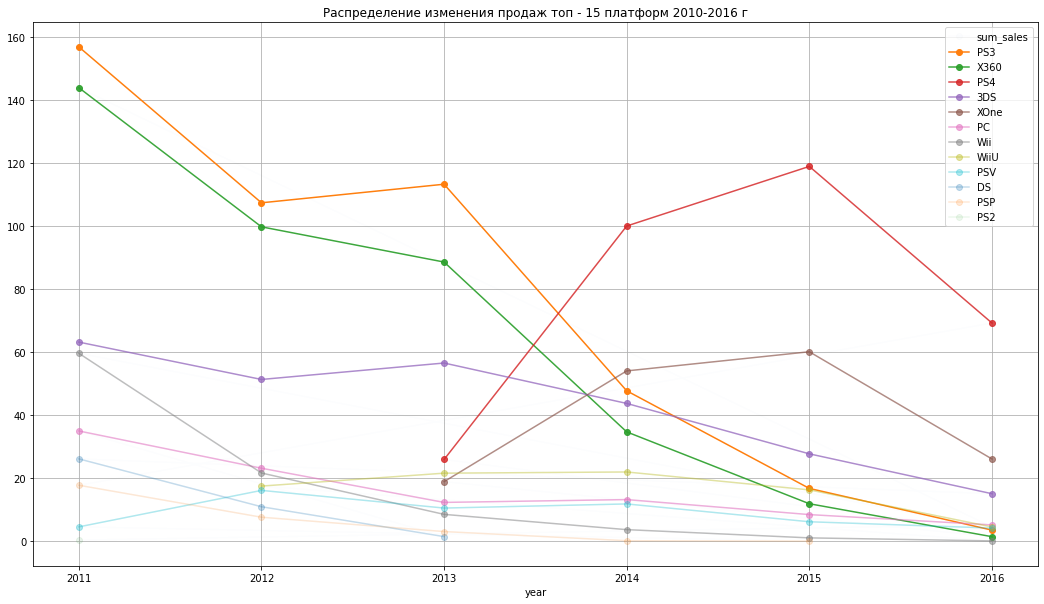

In [27]:
df_platform = (df
 .query('year_of_release > 2010')
 .pivot_table(index='platform',
              values='total_sales',
              aggfunc='sum')

 .sort_values(by='total_sales',
              ascending=False)
 .reset_index()
 #.head(15)
 )

idx = df_platform.platform

display(df_platform)

ax1 = (df_pvt_plat
       .query('year > 2010')
       .plot(x = 'year',
             y='sum_sales',
             style='o-',
             alpha = 0.01,
             title='Распределение изменения продаж топ - 15 платформ 2010-2016 г'))

i = len(df_platform.index)
year = []
for platform in idx:
    ax2 = (df_pvt_plat
           .query('year > 2010')
           .query('platform == @platform')
           .plot(x='year',
                 y='sum_sales',
                 style='o-',
                 figsize=(18,10), 
                 grid=True, 
                 legend=True,
                 ax=ax1,
                 alpha = 1/len(idx)*i,
                 label=platform))

    i-=1

Видим, что продажи большинства платформ падают. Рост наблюдается у PS4 и XOne, также высокие продажи наблюдаются у 3DS

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за актуальный период:

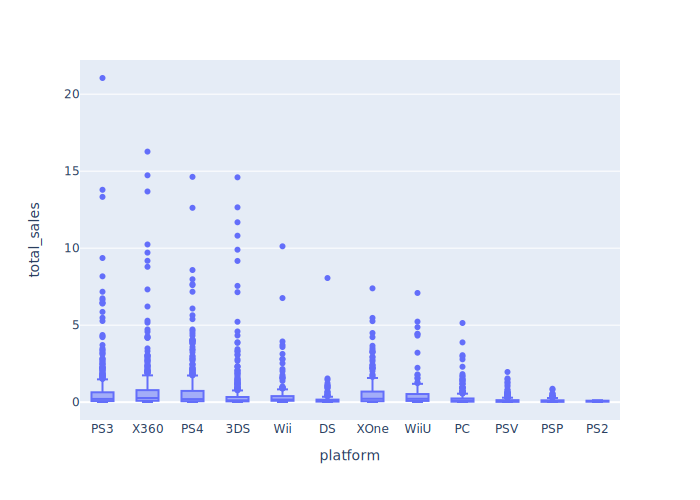

In [28]:
fig = px.box(df.query('year_of_release > 2010'), x="platform", y="total_sales")
fig.show()

Видим большой разброс продаж игр внутри одной платформы. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [29]:
df_score = df.query('year_of_release >= 2010').loc[:,['critic_score','user_score','total_sales','platform']].fillna(-1)
df_score.loc[df_score['user_score'] == 'tbd', 'user_score'] = -1
df_score.user_score = df_score.user_score.astype(float)
df_score = df_score[(df_score['user_score'] != -1) & (df_score['critic_score'] != -1)]
df_score.query('platform == "PS3"')

,critic_score,user_score,total_sales,platform
16,97,8.2,21.05,PS3
34,83,5.3,13.79,PS3
37,88,3.2,13.33,PS3
41,88,6.4,12.63,PS3
54,84,7.5,10.70,PS3
...,...,...,...,...
15567,67,6.8,0.02,PS3
15649,82,7.9,0.01,PS3
15742,50,5.0,0.02,PS3
16146,73,6.9,0.01,PS3


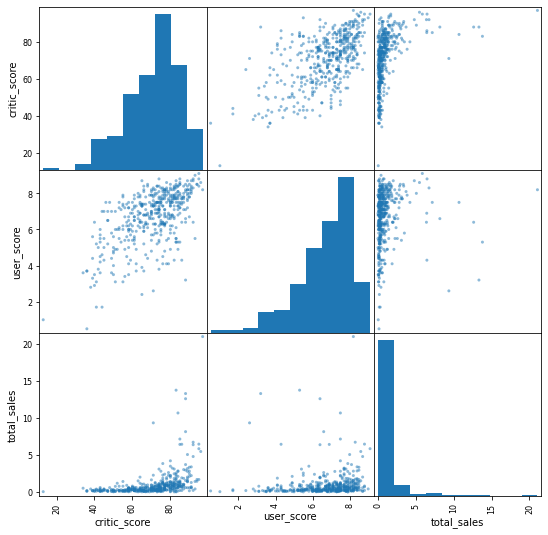

In [30]:
pd.plotting.scatter_matrix(df_score.query('platform == "PS3"'), figsize=(9, 9))
plt.show()

In [31]:
df_score.query('platform == "PS3"').corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.595259,0.393604
user_score,0.595259,1.000000,0.082736
total_sales,0.393604,0.082736,1.000000


Видим корреляцию общих продаж с оценкой критиков. Взаимосвязь оценки пользователей и продаж выражана меньше.

Соотнесем выводы с продажами игр на других платформах:

In [32]:
for platform in idx:
    print(platform)
    print(df_score.query('platform == @platform').corr().dropna())
    print('')

PS3
              critic_score  user_score  total_sales
critic_score      1.000000    0.595259     0.393604
user_score        0.595259    1.000000     0.082736
total_sales       0.393604    0.082736     1.000000

X360
              critic_score  user_score  total_sales
critic_score      1.000000    0.597552     0.336280
user_score        0.597552    1.000000     0.055079
total_sales       0.336280    0.055079     1.000000

PS4
              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.405895
user_score        0.557654    1.000000    -0.033625
total_sales       0.405895   -0.033625     1.000000

3DS
              critic_score  user_score  total_sales
critic_score      1.000000    0.745222     0.338904
user_score        0.745222    1.000000     0.232089
total_sales       0.338904    0.232089     1.000000

XOne
              critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.410422
user_score        0.472462    1.000000

Старый вывод: Видим что у портативных платформ PSP, WiiU и 3DS взаимосвязь оценки пользователей с продажами выше чем у остальных платформ.

Посмотрим на общее распределение игр по жанрам.
- Что можно сказать о самых прибыльных жанрах? - 
- Выделяются ли жанры с высокими и низкими продажами?

In [33]:
df_genre = df.query('year_of_release >= 2010').pivot_table(index='genre', values='total_sales', aggfunc=['sum','count','mean'])
df_genre.columns=['sum_sales','count','mean']
df_genre.sort_values(by='sum_sales', ascending=False)

,sum_sales,count,mean
genre,,,
Action,673.09,1495,0.450227
Shooter,479.74,410,1.170098
Sports,328.39,575,0.571113
Role-Playing,315.28,568,0.555070
Misc,234.56,576,0.407222
Racing,122.68,237,0.517637
Platform,119.72,153,0.782484
Fighting,81.59,199,0.410000
Simulation,71.75,217,0.330645


Видим, что наиболее популярен жанр экшн, лидер по количеству продаж. Наибольшая средняя прибыль у жанра Platform. Наименьшие продажи у жанров Adventure и Strategy.

**Вывод:** 

В результате исследования выявили платформы с наибольшим количеством продаж 'PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii', 'WiiU', 'PSV', 'DS', 'PSP', 'PS2', установили актуальный период, медианное время жизни платформы 6 лет. Установили, что у портативных платформ наиболее выражена взаимосвязь оценки пользователей и продажами, а у остальных продажи коррелируют выраженнее с оценкой критиков. Наиболее популярным является жанр экшн по количеству выпускаемых игр и общим продажам, по средним продажам лидирует жанр Platform, наименее популярны жанры Adventure и  Strategy

## Исследование регионов

Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.

Выясним влияет ли рейтинг ESRB на продажи в отдельном регионе?


,platform,eu_sales_sum,jp_sales_sum,na_sales_sum,other_sales_sum,total_sales_sum,eu_sales_cnt,jp_sales_cnt,na_sales_cnt,other_sales_cnt,total_sales_cnt
4,PS3,213.60,59.26,229.25,85.63,587.74,889,889,889,889,889
10,X360,163.41,5.46,334.18,47.36,550.41,680,680,680,680,680
5,PS4,141.09,15.96,108.74,48.35,314.14,392,392,392,392,392
0,3DS,61.27,100.62,82.65,13.27,257.81,512,512,512,512,512
8,Wii,65.91,17.75,121.20,18.11,222.97,450,450,450,450,450
11,XOne,51.59,0.34,93.12,14.27,159.32,247,247,247,247,247
1,DS,28.06,27.90,59.66,8.13,123.75,507,507,507,507,507
2,PC,68.82,0.00,39.07,14.07,121.96,479,479,479,479,479
9,WiiU,25.13,13.01,38.10,5.95,82.19,147,147,147,147,147
6,PSP,7.59,42.20,9.65,4.61,64.05,500,500,500,500,500


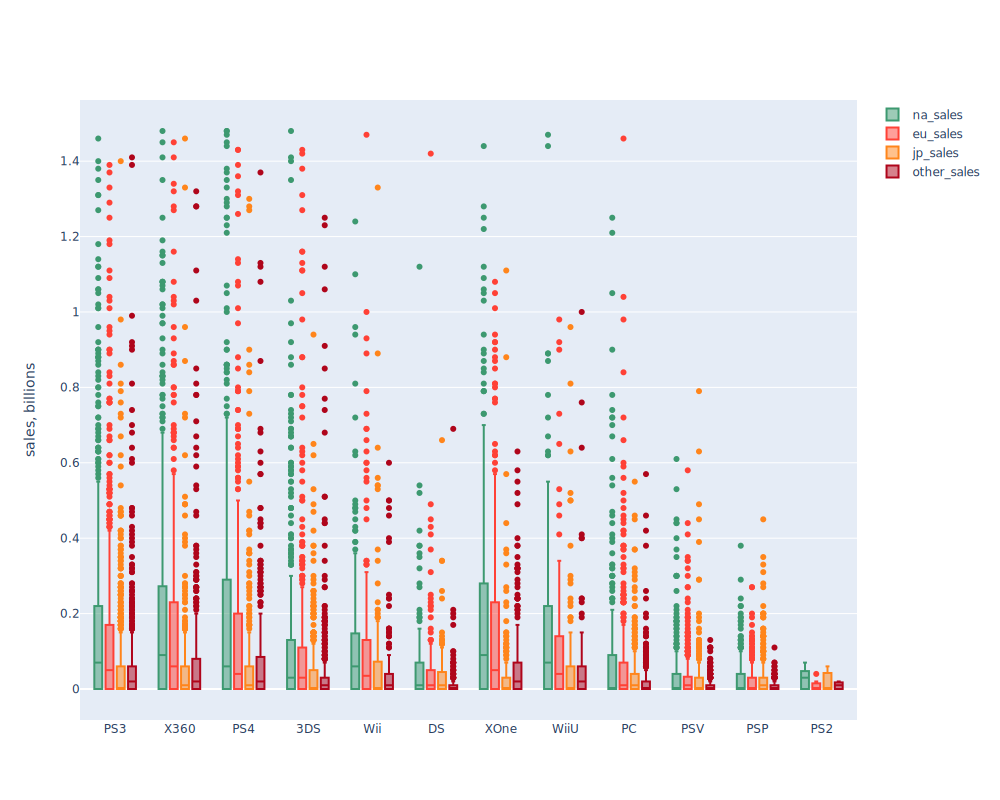

In [34]:
df_pvt_local = (df.query('year_of_release >= 2010')
 .pivot_table(index='platform',
              values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], 
              aggfunc=['sum', 'count'])         
               )

df_pvt_local.columns = (['eu_sales_sum', 'jp_sales_sum', 'na_sales_sum', 'other_sales_sum', 'total_sales_sum',
                         'eu_sales_cnt', 'jp_sales_cnt', 'na_sales_cnt', 'other_sales_cnt', 'total_sales_cnt'])
df_pvt_local = df_pvt_local.reset_index() 

display(df_pvt_local.sort_values(by='total_sales_sum', ascending=False))

x = df.query('year_of_release > 2010').platform

fig = go.Figure()

fig.add_trace(go.Box(
    y=df.query('year_of_release > 2010 & na_sales < 1.5').na_sales,
    x=x,
    name='na_sales',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=df.query('year_of_release > 2010 & eu_sales < 1.5').eu_sales,
    x=x,
    name='eu_sales',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=df.query('year_of_release > 2010 & jp_sales < 1.5').jp_sales,
    x=x,
    name='jp_sales',
    marker_color='#FF851B'
))
fig.add_trace(go.Box(
    y=df.query('year_of_release > 2010 & other_sales < 1.5').other_sales,
    x=x,
    name='other_sales',
    marker_color='#AF051B'
))


fig.update_layout(
    yaxis_title='sales, billions',
    boxmode='group', # group together boxes of the different traces for each value of x
    height=800,
    width=1000
)
fig.show()

Видим, что по каждой из платформ максимум продаж приходится на Северную Америку, следом идет Европа, продажи в японии и сумарно в других странах варьируются.

Рассмотрим самые популярные платформы по общим продажам (топ-5):

In [35]:
df_pvt_loc = (df
              .query('year_of_release >= 2010')
              .groupby('platform')
              .agg('sum')
              .sort_values(by='total_sales', ascending=False)
              .head(5))

i = 1
for col in df_pvt_loc.columns[1:5]:
    df_pvt_loc[col+str("%")] = round(100 * df_pvt_loc[col] / df_pvt_loc['total_sales'], 1)
    i += 1
df_pvt_loc = df_pvt_loc.reset_index()
df_pvt_loc

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales,na_sales%,eu_sales%,jp_sales%,other_sales%
0,PS3,1788804,229.25,213.60,59.26,85.63,32912,587.74,39.0,36.3,10.1,14.6
1,X360,1367948,334.18,163.41,5.46,47.36,29359,550.41,60.7,29.7,1.0,8.6
2,PS4,789937,108.74,141.09,15.96,48.35,18027,314.14,34.6,44.9,5.1,15.4
3,3DS,1030721,82.65,61.27,100.62,13.27,10802,257.81,32.1,23.8,39.0,5.1
4,Wii,904791,121.20,65.91,17.75,18.11,7939,222.97,54.4,29.6,8.0,8.1


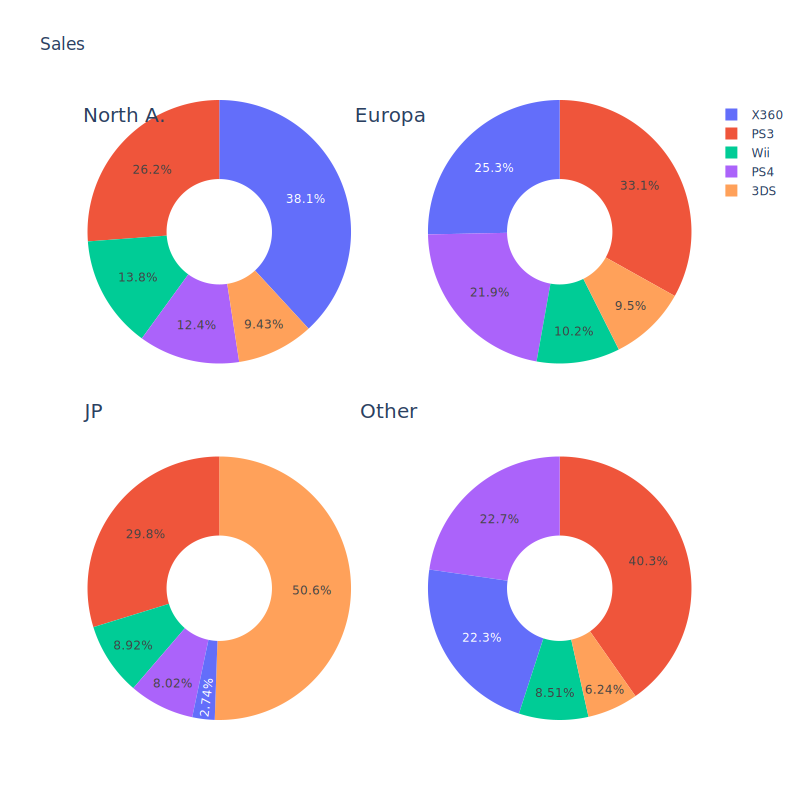

In [36]:
labels = df_pvt_loc.platform

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=df_pvt_loc.na_sales, name="North America"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_loc.eu_sales, name="Europa"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_loc.jp_sales, name="Europa"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_loc.other_sales, name="Europa"),
              2, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Sales",
    annotations=[dict(text='North A.', x=0.0, y=1, font_size=20, showarrow=False),
                 dict(text='Europa', x=0.5, y=1, font_size=20, showarrow=False),
                 dict(text='JP', x=0.0, y=0.5, font_size=20, showarrow=False),
                 dict(text='Other', x=0.5, y=0.5, font_size=20, showarrow=False)],
    height=800,
    width=800
                )

fig.show()

**Вывод:** Видим, что PS3 пользовалась большей популярностью в Европе и других странах чем в Северной Америке и Японии. В Японии популярна платформа 3DS, наименее популярна из топ-5 платформ с наибольшими продажами X360. Соотношение проданных игр различных платформ в Европе и остальных странах схоже, Япония существенно выделяется, в Северной Америке X360 по продажам превышеает показатели PS3 и PS4. 

Рассмотрим самые популярные платформы по каждому из регионов в отдельности (топ-5):

,platform,na_sales
0,X360,334.18
1,PS3,229.25
2,Wii,121.20
3,PS4,108.74
4,XOne,93.12


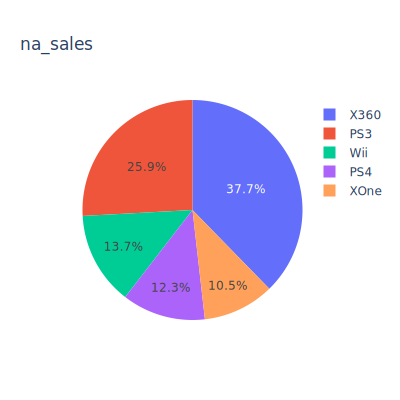

,platform,eu_sales
0,PS3,213.60
1,X360,163.41
2,PS4,141.09
3,PC,68.82
4,Wii,65.91


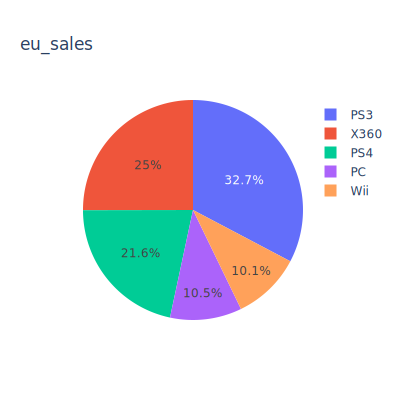

,platform,jp_sales
0,3DS,100.62
1,PS3,59.26
2,PSP,42.20
3,DS,27.90
4,PSV,21.84


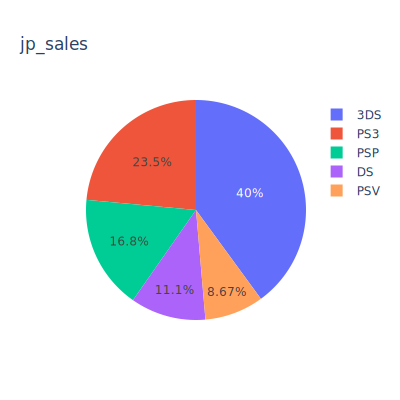

,platform,other_sales
0,PS3,85.63
1,PS4,48.35
2,X360,47.36
3,Wii,18.11
4,XOne,14.27


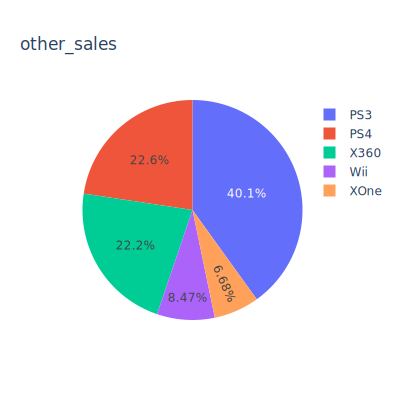

In [37]:
for col in df_pvt_loc.columns[2:6]:

    df_reg = (df
             .query('year_of_release >= 2010')
             .groupby('platform')
             .agg('sum')
             .sort_values(by=col, ascending=False)[col]
             .head(5)
             .reset_index())
    display(df_reg)
    
    fig = px.pie(df_reg, values=col, names='platform', title=col)
    fig.update_layout(height=400, width=400)
    fig.show()
    

**Вывод** Топ-5 продаваемых платформ отличается в регионах, в Северной Америке лидер X360, на 5 месте XOne, в Европе лидирует PS3, на 5 месте Wii, в Японии 1 месте за 3DS, 5-е PSV, в других странах лидер PS3 на 5 месте Xone.

Рассмотрим самые популярные жанры (топ-5)

In [38]:
df_pvt_genre = df.groupby('genre').agg('sum').sort_values(by='total_sales', ascending=False).head(5)

i = 1
for col in df_pvt_genre.columns[1:5]:
    df_pvt_genre[col+str("%")] = round(100 * df_pvt_genre[col] / df_pvt_genre['total_sales'], 1)
    i += 1
df_pvt_genre = df_pvt_genre.reset_index()
df_pvt_genre

,genre,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales,na_sales%,eu_sales%,jp_sales%,other_sales%
0,Action,6640551,879.01,519.13,161.43,184.60,124450,1744.17,50.4,29.8,9.3,10.6
1,Sports,4624648,684.43,376.79,135.54,134.51,84776,1331.27,51.4,28.3,10.2,10.1
2,Shooter,2599792,592.24,317.34,38.76,104.11,65872,1052.45,56.3,30.2,3.7,9.9
3,Role-Playing,2972524,330.81,188.71,355.41,59.63,52784,934.56,35.4,20.2,38.0,6.4
4,Platform,1759377,445.50,200.35,130.83,51.09,33434,827.77,53.8,24.2,15.8,6.2


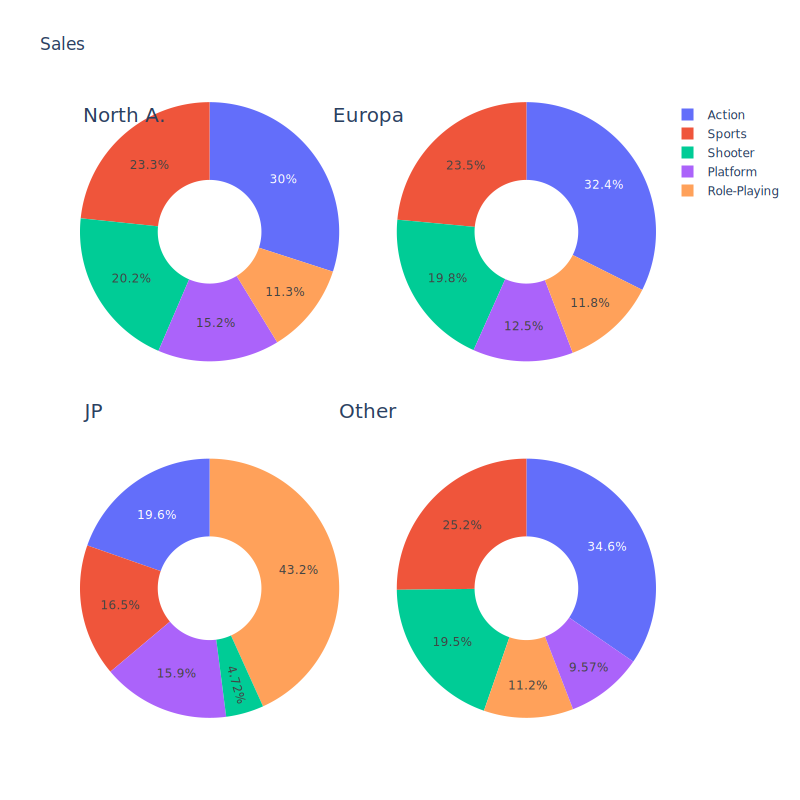

In [39]:
labels = df_pvt_genre.genre

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=df_pvt_genre.na_sales, name="North America"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_genre.eu_sales, name="Europa"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_genre.jp_sales, name="Europa"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_genre.other_sales, name="Europa"),
              2, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Sales",
    annotations=[dict(text='North A.', x=0.0, y=1, font_size=20, showarrow=False),
                 dict(text='Europa', x=0.5, y=1, font_size=20, showarrow=False),
                 dict(text='JP', x=0.0, y=0.5, font_size=20, showarrow=False),
                 dict(text='Other', x=0.5, y=0.5, font_size=20, showarrow=False)],
    height=800,
    width=800
                )

fig.show()

**Вывод:** в Японии наиболее популярный жанр Role-playing, в остальных регионах - Action. Наименее популярен в Японии жанр Shooter, в Европе и Северной Америке - Role-playing, в остальных странах Platform.

Рассмотрим самые популярные жанры по каждому из регионов в отдельности (топ-5):

,genre,na_sales
0,Action,290.64
1,Shooter,237.47
2,Sports,156.81
3,Misc,123.80
4,Role-Playing,112.05


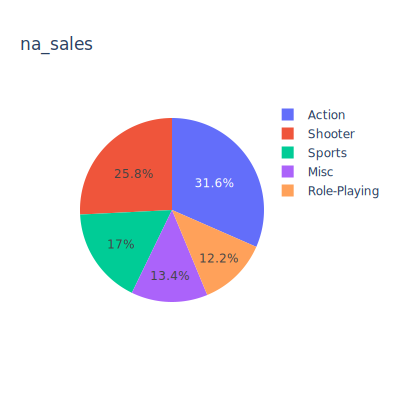

,genre,eu_sales
0,Action,233.63
1,Shooter,171.45
2,Sports,116.84
3,Role-Playing,75.48
4,Misc,66.09


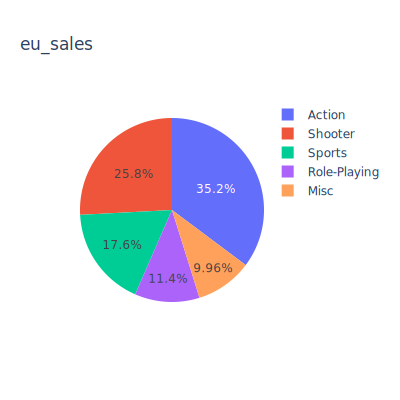

,genre,jp_sales
0,Role-Playing,103.54
1,Action,72.20
2,Misc,24.29
3,Platform,15.81
4,Adventure,15.67


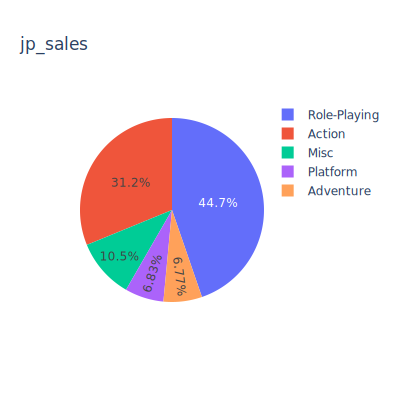

,genre,other_sales
0,Action,76.62
1,Shooter,56.78
2,Sports,39.23
3,Role-Playing,24.21
4,Misc,20.38


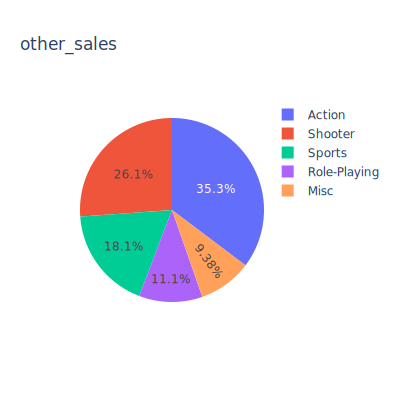

In [40]:
for col in df_pvt_loc.columns[2:6]:

    df_reg = (df
             .query('year_of_release >= 2010')
             .groupby('genre')
             .agg('sum')
             .sort_values(by=col, ascending=False)[col]
             .head(5)
             .reset_index())
    display(df_reg)
    
    fig = px.pie(df_reg, values=col, names='genre', title=col)
    fig.update_layout(height=400, width=400)
    fig.show()
    

**Вывод:** Распределение жанров незначительно поменялось, Action по прежнему самый популярный жанр во всех регионах кроме Японии. Самый популярный жанр в Японии Role-playing, на 5-м месте жанр Adventure.

Выясним влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [41]:
df_pvt_rate = df.query('year_of_release >= 2010').groupby('rating').agg('sum').sort_values(by='total_sales', ascending=False)
df_pvt_rate = df_pvt_rate.reset_index()

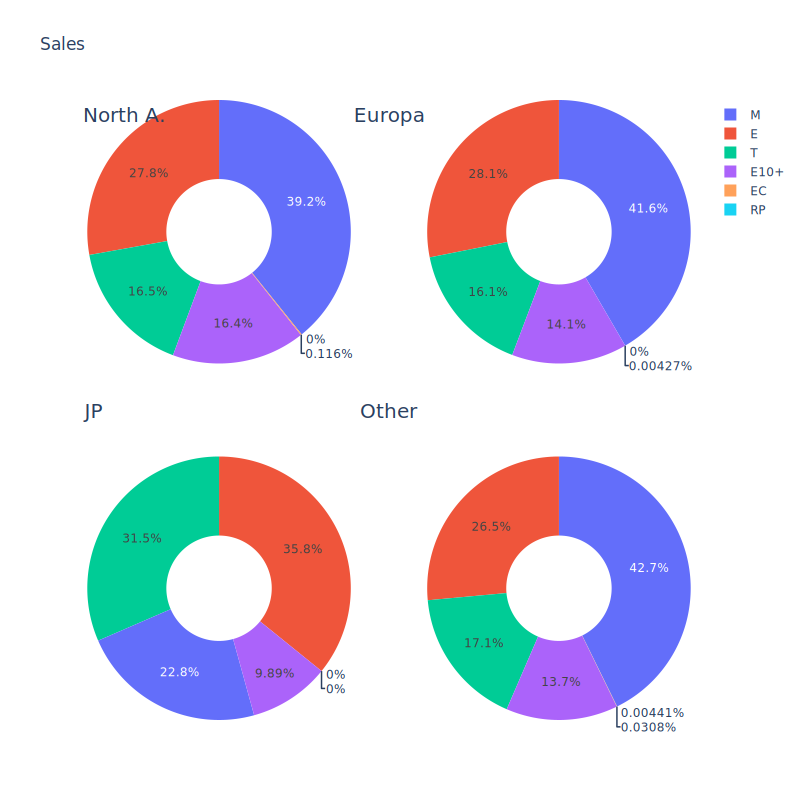

In [42]:
labels = df_pvt_rate.rating

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=df_pvt_rate.na_sales, name="North America"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_rate.eu_sales, name="Europa"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_rate.jp_sales, name="Europa"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_rate.other_sales, name="Europa"),
              2, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Sales",
    annotations=[dict(text='North A.', x=0.0, y=1, font_size=20, showarrow=False),
                 dict(text='Europa', x=0.5, y=1, font_size=20, showarrow=False),
                 dict(text='JP', x=0.0, y=0.5, font_size=20, showarrow=False),
                 dict(text='Other', x=0.5, y=0.5, font_size=20, showarrow=False)],
    height=800,
    width=800
                )

fig.show()

**Вывод:** Продажи с рейтингом E, E10+ приблизительно равны во всех регионах. Продажи игр с рейтингом М для взрослых в Японии ниже чем в остальных регионах. Продажи с рейтингом T для подростков наоборот, в Японии выше чем в остальных регионах. Это может говорить нам как о большем контроле продаж игр для взрослых так и о предпочтениях геймеров.

Обратим внимание на пропуски в рейтинге, заменим на маркерное значение и оценим влияние пропусков.

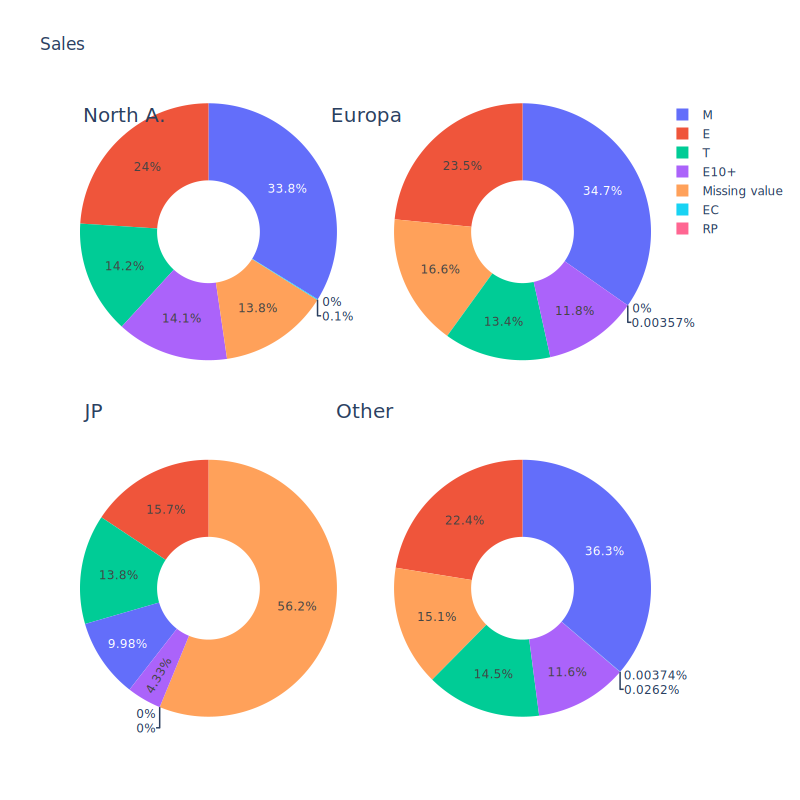

In [43]:
df_rat = df.query('year_of_release >= 2010')
df_rat.rating = df_rat.rating.fillna('Missing value')
df_pvt_rate = df_rat.groupby('rating').agg('sum').sort_values(by='total_sales', ascending=False)
df_pvt_rate = df_pvt_rate.reset_index()
labels = df_pvt_rate.rating

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=df_pvt_rate.na_sales, name="North America"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_rate.eu_sales, name="Europa"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_rate.jp_sales, name="Europa"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=df_pvt_rate.other_sales, name="Europa"),
              2, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Sales",
    annotations=[dict(text='North A.', x=0.0, y=1, font_size=20, showarrow=False),
                 dict(text='Europa', x=0.5, y=1, font_size=20, showarrow=False),
                 dict(text='JP', x=0.0, y=0.5, font_size=20, showarrow=False),
                 dict(text='Other', x=0.5, y=0.5, font_size=20, showarrow=False)],
    height=800,
    width=800
                )

fig.show()

## Статистический анализ

Проверим следующие гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Нулевая гипотеза** **H₀**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза** **H₁**: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые


In [44]:
df_user_sc = df.query('year_of_release >= 2010')

In [45]:
df_user_sc.user_score = df_user_sc.user_score.fillna('tbd')
df_user_sc = df_user_sc.query('user_score != "tbd"')
df_user_sc.user_score = df_user_sc.user_score.astype(float)

cредняя пользовательская оценка XOne:  6.509333333333332
cредняя пользовательская оценка PC 6.599999999999996
p-значение: 0.6023431553090568
Не получилось отвергнуть нулевую гипотезу


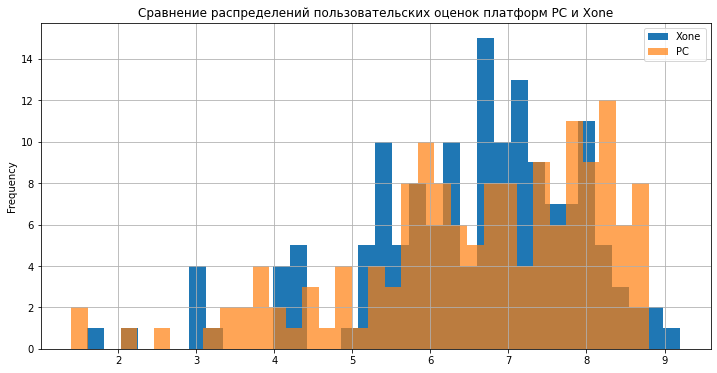

In [46]:
XOne_user_score = df_user_sc.query('platform == "XOne"').user_score.sample(n=150)
PC_user_score = df_user_sc.query('platform == "PC"').user_score.sample(n=150)


print('cредняя пользовательская оценка XOne: ', pd.Series(XOne_user_score).mean())
print('cредняя пользовательская оценка PC', pd.Series(PC_user_score).mean())

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(XOne_user_score, PC_user_score) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
ax1 = (XOne_user_score
       .plot(kind='hist',
             bins=35, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 1.0,
             label='Xone',
             title='Сравнение распределений пользовательских оценок платформ PC и Xone'))

ax2 = (PC_user_score
       .plot(kind='hist', 
             bins=35, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 0.7,
             label='PC'))
plt.show()

Не получилось отвергнуть нулевую гипотезу средняя пользовательская оценка двух платформ одинакова.

**Нулевая гипотеза** **H₀**: Средние пользовательские рейтинги жанров Action и Sports равны.

**Альтернативная гипотеза** **H₁**: Средние пользовательские рейтинги жанров Action и Sports не равны.



cредняя пользовательская оценка Action:  6.744666666666667
cредняя пользовательская оценка Sport 5.968
p-значение: 1.0274706184117426e-05
Отвергаем нулевую гипотезу


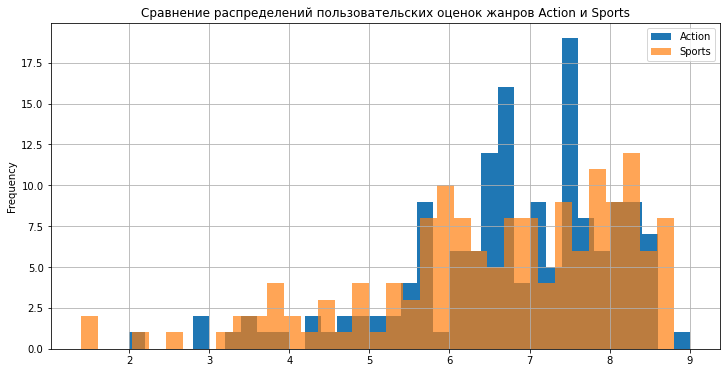

In [47]:
Action_user_score = df_user_sc.query('genre == "Action"').user_score.sample(n=150)
Sport_user_score = df_user_sc.query('genre == "Sports"').user_score.sample(n=150)


print('cредняя пользовательская оценка Action: ', pd.Series(Action_user_score).mean())
print('cредняя пользовательская оценка Sport', pd.Series(Sport_user_score).mean())

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(Action_user_score, Sport_user_score) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
ax1 = (Action_user_score
       .plot(kind='hist',
             bins=35, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 1.0,
             label='Action',
             title='Сравнение распределений пользовательских оценок жанров Action и Sports'))

ax2 = (PC_user_score
       .plot(kind='hist', 
             bins=35, 
             figsize=(12,6), 
             grid=True, 
             legend=True,
             alpha = 0.7,
             label='Sports'))
plt.show()

Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports не равны.

## Заключение

**Выводы:**

В результате исследования выявили:
- Пик по количеству выпускаемых игр пришелся на 2007-2013 года.
- До 1994 на рынке было предствалено не более 6 платформ, в 1993 году выпустилось 60 игр, развитие индустрии пришлось на период конца 90-х начала 00-х.
- Платформы с наибольшими продажами 'PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii', 'WiiU', 'PSV', 'DS', 'PSP', 'PS2'.
- Установили актуальный период, медианное время жизни платформы 6 лет.
- Установили взаимосвязь оценки критиков с продажами, взаимосвязь оценки пользователей с продажами выражена меньше, за исключением портативной платформы WiiU - взаимосвязь оценки пользователей с продажами выше, чем корреляция продаж с оценками критиков. Оценки критиков влияют на количество продаж, предполагаем что оценки критиков выходят при релизах на стартах продаж.
- Наиболее популярным является жанр экшн по количеству выпускаемых игр и общим продажам, по средним продажам лидирует жанр Platform, наименее популярны жанры Adventure и  Strategy
- Установили предпочтения пользователей регионов: PS3 пользовалась большей популярностью в Европе и других странах, чем в Северной Америке и Японии. В Японии популярна платформа DS, наименее популярна из топ-5 платформ с наибольшими продажами XOne. Соотношение проданных игр различных платформ в Северной Америке, Европе и остальных странах схоже, Япония существенно выделяется.
- Также установлены предпочтения в жанрах: в Японии наиболее популярный жанр Role-playing, в остальных регионах - Action. Наименее популярен в Японии жанр Shooter, в Европе и Северной Америке - Role-playing, в остальных странах Platform.
- Топ-5 продаваемых платформ отличается в регионах, в Северной Америке лидер X360, на 5 месте XOne, в Европе лидирует PS3, на 5 месте Wii, в Японии 1 месте за 3DS, 5-е PSV, в других странах лидер PS3 на 5 месте Xone.
- При исследовании по продажам каждого из регионов Action все также самый популярный жанр во всех регионах кроме Японии. Самый популярный жанр в Японии Role-playing, на 5-м месте жанр Adventure.
- Статистический анализ подтвердил что средняя пользовательская оценка платформ PC и XOne одинакова.
- Статистический анализ не подтвердил, что средние пользовательские рейтинги жанров Action и Sports равны.